In [37]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import torch
from torchvision.transforms import Compose, ToTensor
from torchvision.datasets import MNIST
import torch.nn as nn

In [22]:
preprocess = Compose([
    ToTensor()
])

train_dataset = MNIST(root='./data', train=True, download=True, transform=preprocess)
test_dataset = MNIST(root='./data', train=False, download=True, transform=preprocess)

train_data = torch.utils.data.DataLoader(train_dataset, batch_size=64, shuffle=True)
test_data = torch.utils.data.DataLoader(test_dataset, batch_size=64, shuffle=True)

In [21]:
train_data

In [27]:
data_iter = iter(train_data)
images, labels = next(data_iter)
print(images.shape)
print(labels.shape)

torch.Size([64, 1, 28, 28])
torch.Size([64])


In [28]:
labels

tensor([2, 2, 1, 4, 6, 2, 0, 3, 3, 1, 6, 2, 9, 4, 0, 6, 2, 7, 3, 1, 9, 5, 2, 1,
        0, 4, 5, 8, 9, 1, 3, 9, 6, 6, 0, 2, 5, 9, 7, 1, 3, 7, 2, 6, 8, 6, 4, 1,
        7, 7, 3, 7, 3, 0, 6, 1, 1, 7, 3, 4, 3, 7, 1, 5])

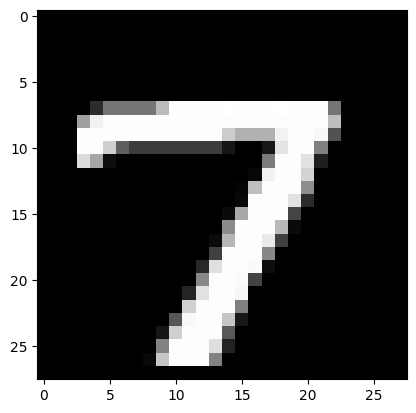

In [35]:
plt.imshow(images[-3].squeeze(), cmap='gray')
plt.show()

In [ ]:
BATCH_SIZE = 64
EPOCH = 10

In [ ]:
class simpleUNet(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(1, 64, 3, padding=1)
        self.conv2 = nn.conv2d(64, 128, 3, padding=1)
        self.conv3 = nn.conv2d(128, 64, 3, padding=1)
        self.conv4 = nn.conv2d(64, 1, 3, padding=1)
        self.relu = nn.ReLU()


    def forward(self, x):
        x = self.relu(self.conv1(x))
        x = self.relu(self.conv2(x))
        x = self.relu(self.conv3(x))
        x = self.conv4(x)

        return x
    

In [55]:
normal_data = np.array(torch.randn(1000))

(array([1., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
        0., 1., 0., 2., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.,
        0., 1., 1., 0., 0., 0., 1., 0., 1., 1., 0., 1., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0.,
        1., 0., 1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 1., 0.,
        0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 1.,
        0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 2., 1., 1., 0.,
        1., 1., 1., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.,
        2., 0., 1., 0., 1., 0., 1., 0., 1., 0., 0., 1., 0., 1., 0., 1., 0.,
        0., 

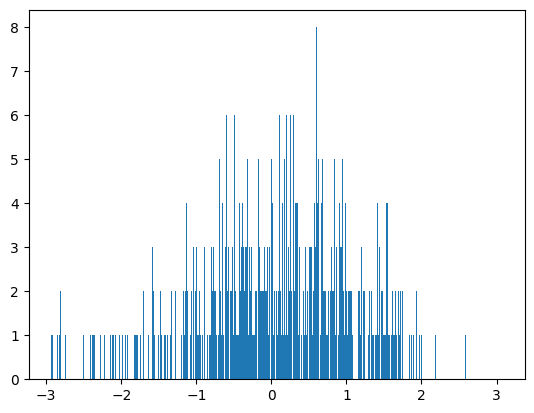

In [56]:
plt.hist(normal_data, bins=len(normal_data))

In [58]:
images[0].shape

torch.Size([1, 28, 28])

torch.Size([1, 28, 28])


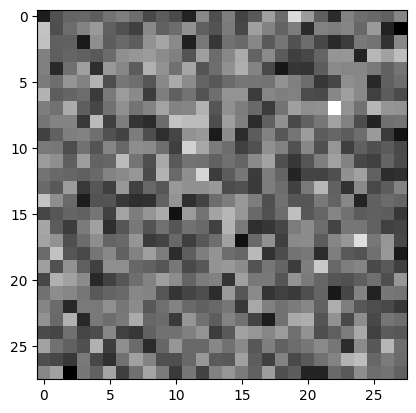

In [ ]:
def forward_add_noise(image, timestep):
    noise = torch.randn(image.shape)
    # noise = torch.randn_like(image)
    return noise


noise = forward_add_noise(images[0], 1)
print(noise.shape)
plt.imshow(noise.squeeze(), cmap='gray')
plt.show()
